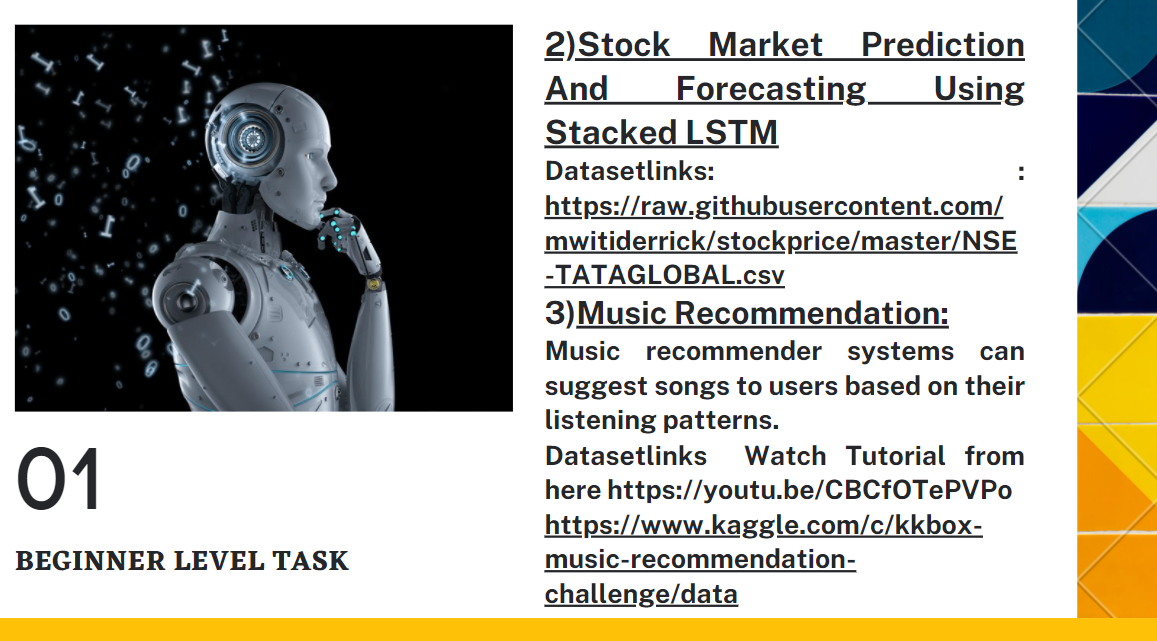

In [1]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('BG Task.png')
cv2_imshow(image)

**LetsGrowMore - Data Science Intern**

***AUTHOR : Jeeva K***

**Stock Market Prediction And Forecasting Using Stacked LSTM**

**Importing All Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Loading Data**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


**Data Preprocessing Techniques**

    Missing values
    Data Cleaning
    Extract Features
    Feature Encoding
    Label Encoding
    Handle Outliers
    Separate Independent and dependent Features
    then Select best Feature

**Data Exploration**

Data exploration is a key aspect of data analysis and model building. Without spending significant time on understanding the data and its patterns one cannot expect to build efficient predictive models. Data exploration takes major chunk of time in a data science project comprising of data cleaning and preprocessing

**Missing values**

In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

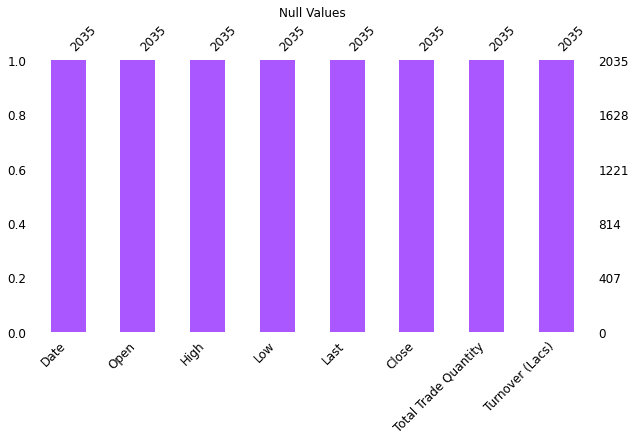

In [ ]:
import missingno as no
no.bar(df,figsize=(10,5), fontsize=12, color=(0.67, 0.34, 1.0))
plt.title("Null Values")
plt.show()

**Full summary of the dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


**Statistical details of the dataset**

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


**Shape of dataset**

In [ ]:
df.shape

(2035, 8)

**Find the dtypes in the Dataset**

In [ ]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

**Finding all the column names inside the dataset**

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

**Function return Series with number of distinct observations over requested axis**

In [ ]:
df.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

**Data Visuaization**

**Find the correlation of dataset**

In [ ]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


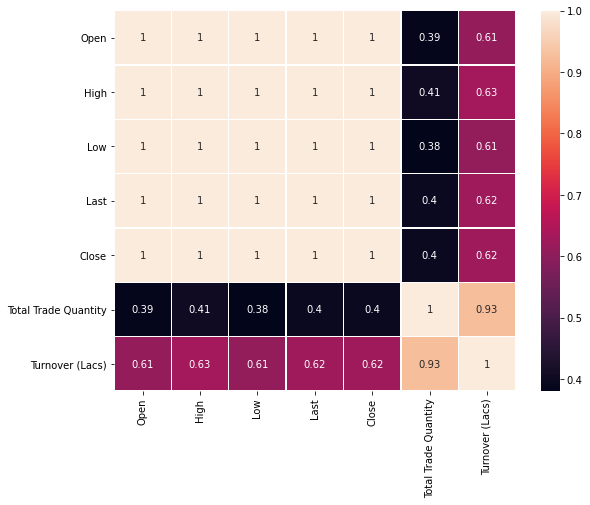

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,linewidths=.5)
plt.show()

**Find the covariance of dataset**

In [ ]:
df.cov()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,2.368234e+03,2.402297e+03,2.329844e+03,2.366284e+03,2.365428e+03,3.928804e+07,1.363248e+05
High,2.402297e+03,2.441655e+03,2.365561e+03,2.405993e+03,2.405074e+03,4.200653e+07,1.424222e+05
Low,2.329844e+03,2.365561e+03,2.297473e+03,2.333630e+03,2.332806e+03,3.816217e+07,1.333141e+05
Last,2.366284e+03,2.405993e+03,2.333630e+03,2.374863e+03,2.373771e+03,4.070656e+07,1.391231e+05
Close,2.365428e+03,2.405074e+03,2.332806e+03,2.373771e+03,2.372863e+03,4.064693e+07,1.389818e+05
Total Trade Quantity,3.928804e+07,4.200653e+07,3.816217e+07,4.070656e+07,4.064693e+07,4.375536e+12,8.862417e+09
Turnover (Lacs),1.363248e+05,1.424222e+05,1.333141e+05,1.391231e+05,1.389818e+05,8.862417e+09,2.089192e+07


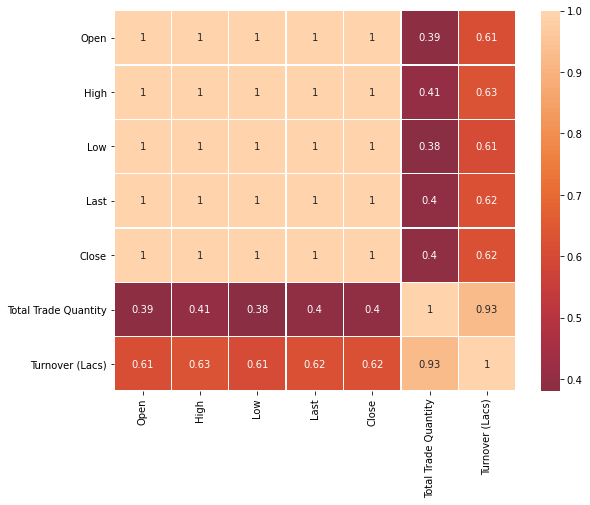

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,center=0,linewidths=.5)
plt.show()

**Histogram**

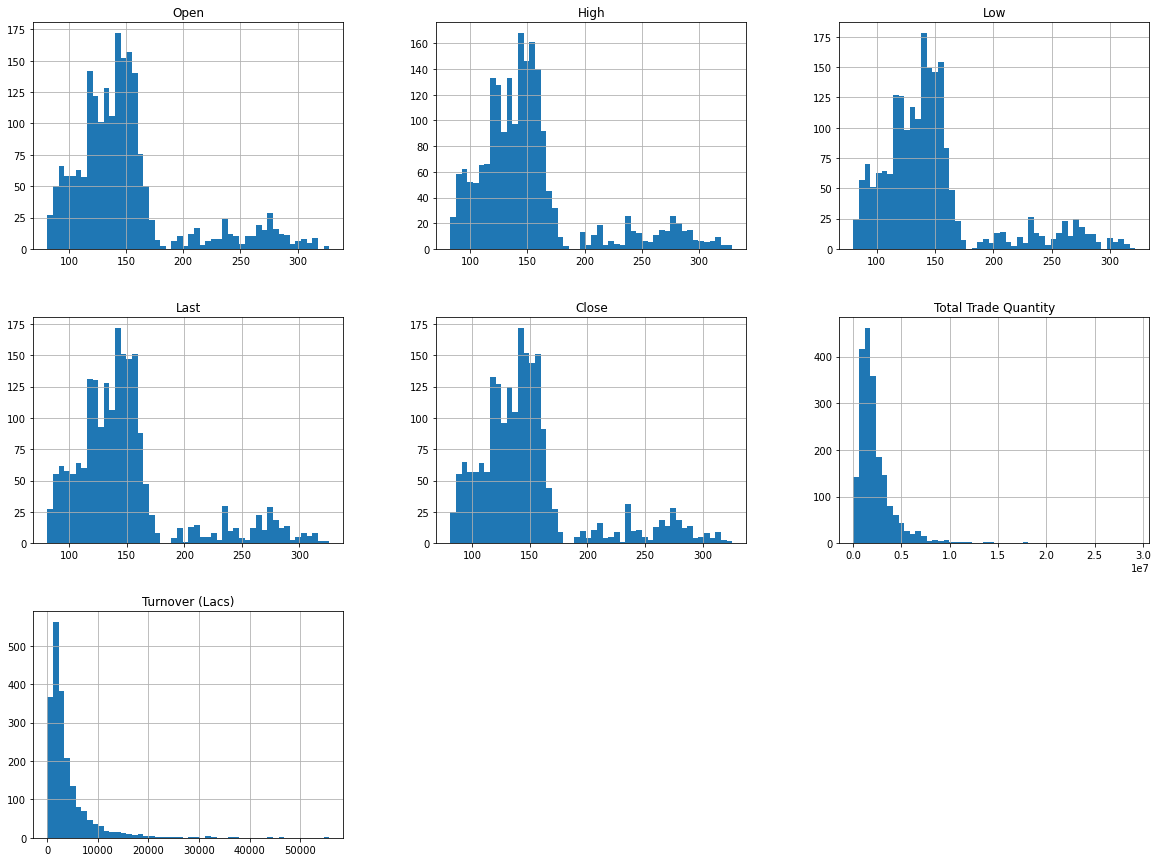

In [ ]:
df.hist(bins=50 ,figsize=(20,15))
plt.show()

**Reset Index**

In [ ]:
data=df.reset_index()['Close']

In [ ]:
data

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [ ]:
training_size=int(len(data)*0.65)
testing_size=len(data)-training_size
training_data = data[0:training_size,:]
testing_data = data[training_size:len(data),:1]

In [ ]:
import numpy

In [ ]:
def create_dataset(dataset, time_step=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
        return numpy.array(data_x), numpy.array(data_y)

In [ ]:
time_step = 100
xtrain, ytrain = create_dataset(train_data, time_step)
xtest, ytest = create_dataset(test_data, time_step)

In [ ]:
xtrain =xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

**Prediction**

In [ ]:
train_predict = model.predict(xtrain)
test_predict = model.predict(xtest)
y_pred_train = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(test_predict)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

**Mean Squared Error**

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,y_pred_test))

82.09670756221597

**Mean Absolute Error**

In [ ]:
import math
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_absolute_error(ytrain,y_pred_train))

9.19812918739761